###1. Recall $M$, $N$ and a loss matrix $L \in [−1, 1]^{M \times N}$ that corresponds to the game “Rock Paper Scissors”.

3 options can be played : Rock, Paper, Scissors.
 - Rock crushes scissors, 
 - Paper covers Rock, 
 - Scissors cuts paper
 
Therefore the loss matrix $L \in [-1, 1]^{3 \times 3}$ is the following : $\begin{matrix}
   & Rock & Paper & Scissors\\
  Rock & 0 & 1 & -1\\
  Paper & -1 & 0 & 1\\
  Scissors & 1 & -1 & 0
\end{matrix}$

M=N=3






###2. Simulation against a fixed adversary. Consider the game “Rock paper scissors” and assume that the adversary chooses $q_t = (\frac{1}{3}, \frac{1}{6}, \frac{1}{2})$ and samples $j_t \sim q_t$ for all rounds $t \geq 1$.

**a. What is the loss $l_t(i)$ incurred by the player if he chooses action $i$ at time $t$ ?**

$l_t(i) = L[i,j_t]$ where $j_t$ is the action of the adversary player.

**b. Simulate an instance of the game for $t = 1, . . . , T = 100$ for $\eta = 1$. Plot the evolution of the weight vectors $p_1, p_2, . . . , p_T$ . What seems to be the best strategy against this adversary ?**


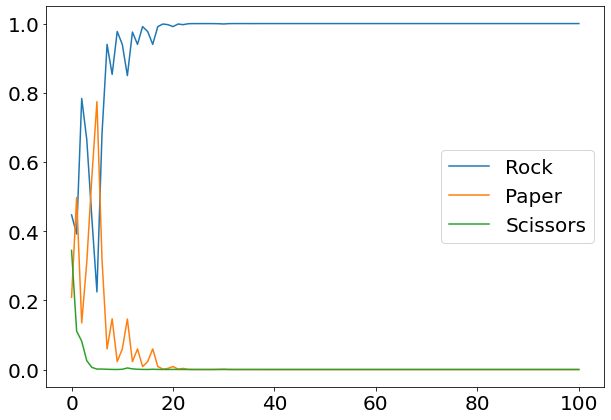

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams.update({'font.size': 20})

# Loss matrix
L = np.array([[0, 1, -1], [-1, 0, 1], [1, -1, 0]])

# Sample from probability distribution p
def rand_weighted(p):
  return np.random.choice(a = range(0, len(p)), p = p)

# EWA update algorithm 
def ewa_update(p, loss, eta):
  """
  p = vector of proba, 
  loss = vector of loss incurred 
  eta = learning rate
  """
  new_p = p * np.exp(-eta*loss)
  normalization = sum(new_p)
  return new_p / normalization

# Simulation
def simulate(p_0, q, T, eta, L):
  """
  p_0 = vector of proba, 
  q = fixed adversary strategy (vector of proba)
  T = time horizon, 
  eta = learning rate, 
  L = loss matrix
  """
  p = [p_0]
  loss_t = [0]
  cumulative_regret = [0]
  for t in range(T):
    i = rand_weighted(p[-1])
    j = rand_weighted(q)
    l = L[i, j]
    best_action = 0 # playing rock is the best action against this fixed adversary
    new_p = ewa_update(p[-1], L[:, j], eta)
    p.append( new_p )
    loss_t.append( l )
    cumulative_regret.append( cumulative_regret[-1] + l - L[best_action,j] )
  return p, loss_t, cumulative_regret

p_0 = np.random.uniform(size=3)
p_0 = p_0/sum(p_0)

p, loss_t, cumulative_regret = simulate(p_0 = p_0, q = np.array([1./3,1./6,1./2]), T = 100, eta = 1, L = L)
labels = ["Rock", "Paper", "Scissors"]

plt.figure(figsize=(10,7))
for i in range(len(p[0])):
  plt.plot([p[j][i] for j in range(len(p))], label=f"{labels[i]}")
plt.legend();

Best strategy against this fixed adversary is to play "rock". This result is quite intuitive since the most played ction of the adversary is "scissors" which loses against "rock".

**c. Plot the average loss $\bar{l}_t = \frac{1}{t} \sum_{s=1}^t l(i_s, j_s)$ as a function of $t$.**

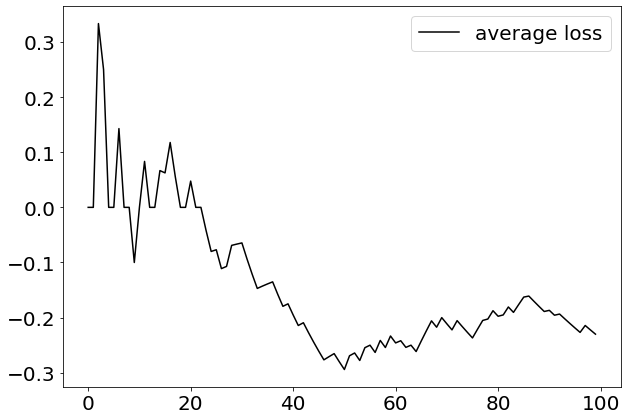

In [ ]:
avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
plt.figure(figsize=(10,7))
plt.plot(avg_loss, label="average loss", c="k")
plt.legend();

**d. Repeat one simulation for different values of learning rates $\eta \in \{0.01, 0.05, 0.1, 0.5, 1\}$. What are the best $\eta$ in practice and in theory ?**

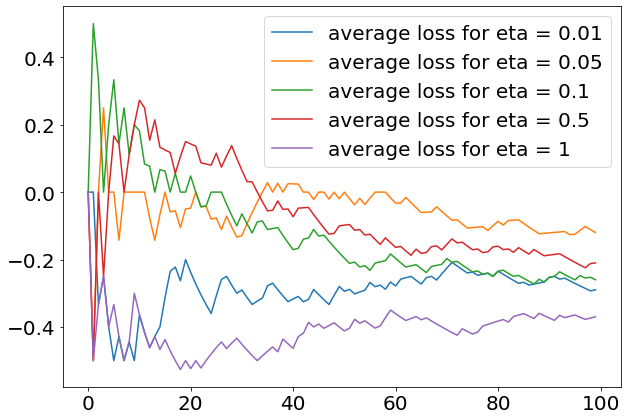

In [ ]:
plt.figure(figsize=(10,7))
regrets = []
for eta in [0.01, 0.05, 0.1, 0.5, 1]:
  p, loss_t, cumulative_regret = simulate(p_0 = p_0, q = np.array([1./3,1./6,1./2]), T = 100, eta = eta, L = L)
  avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
  plt.plot(avg_loss, label=("average loss for eta = " + str(eta)))
  regrets.append(cumulative_regret)
plt.legend(fontsize=20)
plt.show();

By theorem for regret bound for EWA algorithm, theoretical optimal $\eta$ is $\sqrt{\frac{log K}{T}} = \sqrt{\frac{log 3}{100}}$

In [ ]:
np.sqrt(np.log(3)/100)

0.1048147073968205

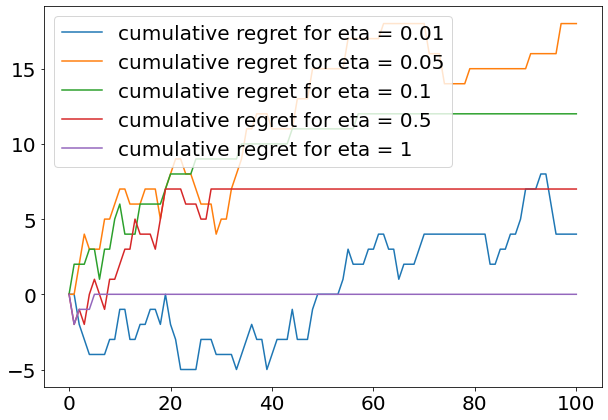

In [ ]:
plt.figure(figsize=(10,7))
eta = [0.01, 0.05, 0.1, 0.5, 1]
for regret in range(len(regrets)):  
  plt.plot(regrets[regret], label="cumulative regret for eta = " + str(eta[regret]))
plt.legend(fontsize=20)
plt.show();

In practice the average loss and the cumulative regret seem minimal for $\eta = 1$ ; average loss in that case is even negative which means there is a gain for the player.

ps: because of randomness this result changes each time we run the algorithm but on average $\eta = 1$ seems to be the best $\eta$ in practice.

###3. Simulation against an adaptive adversary.

**a. Consider a version of OGD with decision set $q_t = \Delta_N$ that chooses action $j_t \sim q_t$ and suffers the expected loss $l_t(q_t) = \sum_{i=1}^N q_t(j) g_t(j)$ where $g_t(j) = L(i_t
, j)$. What is the update of OGD in this case? Define a function OGD_update that takes as input a vector $q_t$, the loss vector $g_t$, and a learning rate $\eta > 0$ and return $q_{t+1} \in \Delta_N$.**

The update of OGD is the following :
$$Proj_{\Delta_n}\left( \: q_t - \eta \nabla l_t(q_t)\: \right) \mapsto q_{t+1}$$
$$Proj_{\Delta_n}( \: q_t - \eta g_t \: ) \mapsto q_{t+1}$$

**b. Repeat the simulation of Question 2.b) when the adversary is choosing pt with OGD with learning parameter $\eta = 0.05$.**


initial strategy of player 1 (playing EWA then): [0.55282608 0.07358983 0.37358409]
initial strategy of player 2 (playing OGD then): [0.36790253 0.55474137 0.07735611]


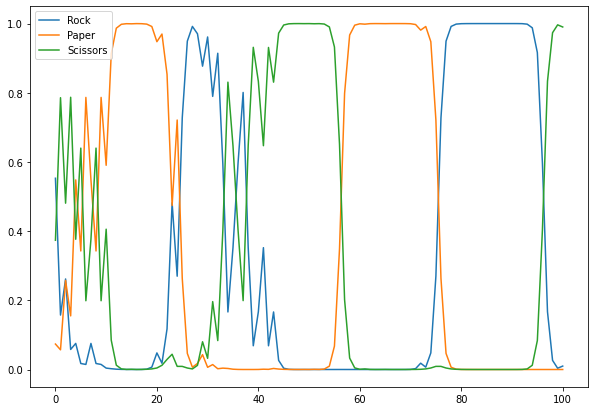

In [ ]:
def projection_simplex(v, z=1):
  # https://gist.github.com/mblondel/6f3b7aaad90606b98f71
  n_features = v.shape[0]
  u = np.sort(v)[::-1]
  cssv = np.cumsum(u) - z
  ind = np.arange(n_features) + 1
  cond = u - cssv / ind > 0
  rho = ind[cond][-1]
  theta = cssv[cond][-1] / float(rho)
  w = np.maximum(v - theta, 0)
  return w
    
# EWA update algorithm 
def ogd_update(q_t, g_t, eta):
  """
  q_t = vector of proba, 
  g_t = vector of loss incurred 
  eta = learning rate
  """
  new_qt = q_t - eta*g_t
  new_qt = projection_simplex(new_qt)
  return new_qt

# Simulation
def simulate(p_0, q_0, T, eta_1, eta_2, L):
  """
  p_0 = vector of proba, 
  q_0 = adversary vector of proba,
  T = time horizon, 
  eta = learning rates, 
  L = loss matrix
  """
  p = [p_0]
  q = [q_0]
  loss_t = [0]
  loss_t_adv = [0]#
  cumulative_regret = [0]
  cumulative_regret_adv = [0]#
  for t in range(T):
    i = rand_weighted(p[-1])
    j = rand_weighted(q[-1])
    l = L[i, j]
    best_action = np.argmin(L[:,j])
    best_action_adv = np.argmin(L[i,:])#
    new_p = ewa_update(p[-1], L[:, j], eta_1)
    new_q = ogd_update(q[-1], -L[i, :], eta_2)
    p.append( new_p )
    q.append( new_q )
    loss_t.append( l )
    loss_t_adv.append( -l )#
    cumulative_regret.append( cumulative_regret[-1] + l - L[best_action,j] )
    cumulative_regret_adv.append( cumulative_regret_adv[-1] - l + L[i,best_action_adv] )   
  return p, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv

p_0 = np.random.uniform(size=3)
p_0 = p_0/sum(p_0)

q_0 = np.random.uniform(size=3)
q_0 = q_0/sum(q_0)

print(f"initial strategy of player 1 (playing EWA then): {p_0}\ninitial strategy of player 2 (playing OGD then): {q_0}")
p, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv = simulate(p_0 = p_0, q_0 = q_0, T = 100, eta_1 = 1, eta_2 = 0.05, L = L)

plt.figure(figsize=(10,7))
for i in range(len(p[0])):
  plt.plot([p[j][i] for j in range(len(p))], label=f"{labels[i]}")
plt.legend();

**c. Plot 1
t
Pt
s=1 `(is, js) as a function of t. What strategy seems to be the best between OGD and EWA?
Admitted: It is possible to show that if both players play according to a regret minimizing strategy the
cumulative loss of the player converges to the value of the game**

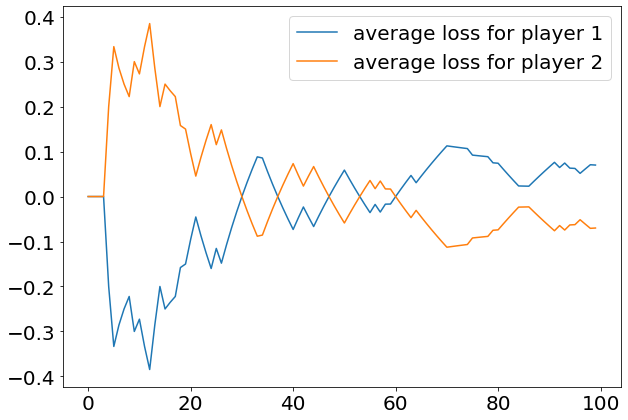

In [ ]:
plt.figure(figsize=(10,7))
avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
avg_loss_adv = [sum(loss_t_adv[:t])/t for t in range(1,len(loss_t_adv))]
plt.plot(avg_loss, label=("average loss for player 1"))
plt.plot(avg_loss_adv, label=("average loss for player 2"))
plt.legend()
plt.show();

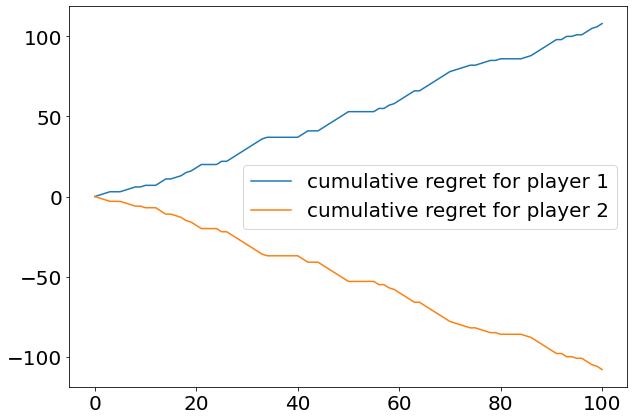

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(cumulative_regret, label="cumulative regret for player 1")
plt.plot(cumulative_regret_adv, label="cumulative regret for player 2")
plt.legend()
plt.show();

bandit feedback

EXP3 corresponds to the adaptation of EWA algorithm in a setup where players do not know the game in advance, that is to say they only observe the loss of the actions played at time t : $i_t$ and $j_t$. Therefore coordinate k of EWA weight at time t+1 : $$\frac{e^{- \eta \sum_{s=1}^t} l_s(k)}{\sum_{j=1}^K e^{- \eta \sum_{s=1}^t} l_s(k)}$$ cannot be computed since player does not observe $l_s(k)$ for k different than the action played.

Thus we estimate the loss with an unbiased estimator : $$\hat{l}_t(k) = \frac{l_t(k)}{p_t(k)} 1_{k = i_t}$$ and we define the weights in the EXP3 algorithm as : $$\frac{e^{- \eta \sum_{s=1}^t} \hat{l}_s(k)}{\sum_{j=1}^K e^{- \eta \sum_{s=1}^t} \hat{l}_s(k)}$$

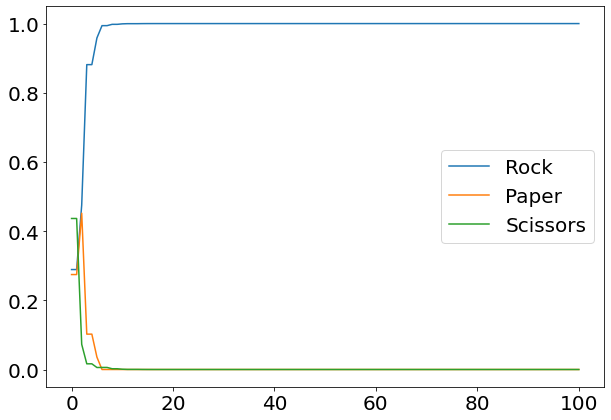

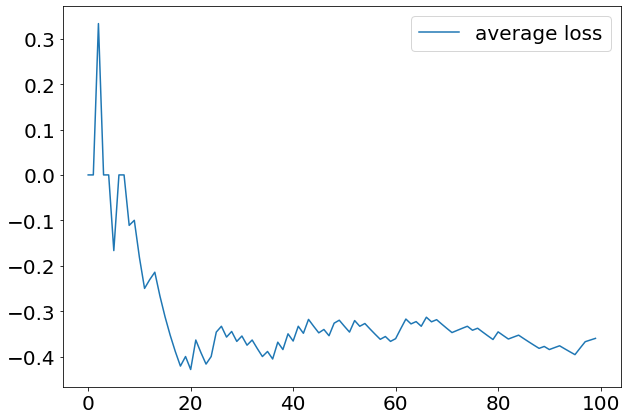

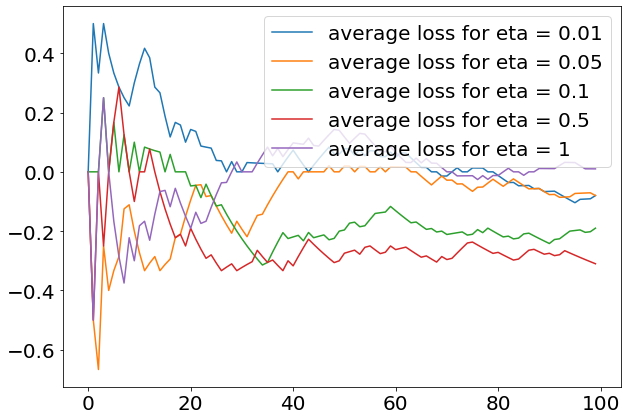

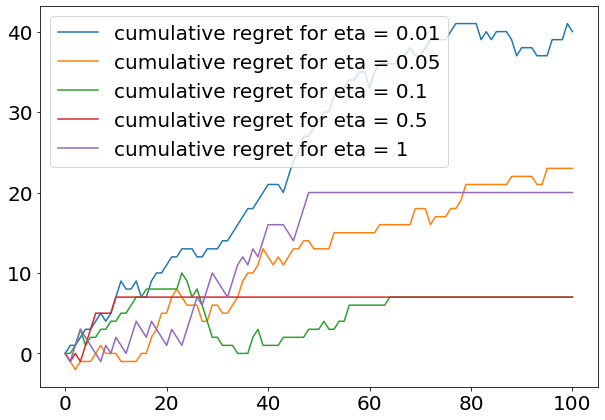

In [ ]:
def exp3_update(p, k, loss, eta):
  """
  p = vector of proba, 
  k = index action played,
  loss = vector of loss incurred 
  eta = learning rate
  """
  estimated_loss = np.zeros(len(loss))
  estimated_loss[k] = loss[k]/p[k]
  return ewa_update(p, estimated_loss, eta)

# Simulation
def simulate(p_0, q, T, eta, L):
  """
  p_0 = vector of proba, 
  q = fixed adversary strategy (vector of proba)
  T = time horizon, 
  eta = learning rate, 
  L = loss matrix
  """
  p = [p_0]
  loss_t = [0]
  cumulative_regret = [0]
  for t in range(T):
    i = rand_weighted(p[-1])
    j = rand_weighted(q)
    l = L[i, j]
    best_action = 0 # playing rock is the best action against this fixed adversary
    new_p = exp3_update(p[-1], i, L[:, j], eta)
    p.append( new_p )
    loss_t.append( l )
    cumulative_regret.append( cumulative_regret[-1] + l - L[best_action,j] )
  return p, loss_t, cumulative_regret

p_0 = np.random.uniform(size=3)
p_0 = p_0/sum(p_0)

p, loss_t, cumulative_regret = simulate(p_0 = p_0, q = np.array([1./3,1./6,1./2]), T = 100, eta = 1, L = L)
labels = ["Rock", "Paper", "Scissors"]

plt.figure(figsize=(10,7))
for i in range(len(p[0])):
  plt.plot([p[j][i] for j in range(len(p))], label=f"{labels[i]}")
plt.legend();

avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
plt.figure(figsize=(10,7))
plt.plot(avg_loss, label="average loss")
plt.legend();

plt.figure(figsize=(10,7))
regrets = []
for eta in [0.01, 0.05, 0.1, 0.5, 1]:
  p, loss_t, cumulative_regret = simulate(p_0 = p_0, q = np.array([1./3,1./6,1./2]), T = 100, eta = eta, L = L)
  avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
  plt.plot(avg_loss, label=("average loss for eta = " + str(eta)))
  regrets.append(cumulative_regret)
plt.legend()
plt.show();

plt.figure(figsize=(10,7))
eta = [0.01, 0.05, 0.1, 0.5, 1]
for regret in range(len(regrets)):  
  plt.plot(regrets[regret], label="cumulative regret for eta = " + str(eta[regret]))
plt.legend()
plt.show();

initial strategy of player 2 (playing EXP3): [0.41222786 0.18998176 0.39779038]


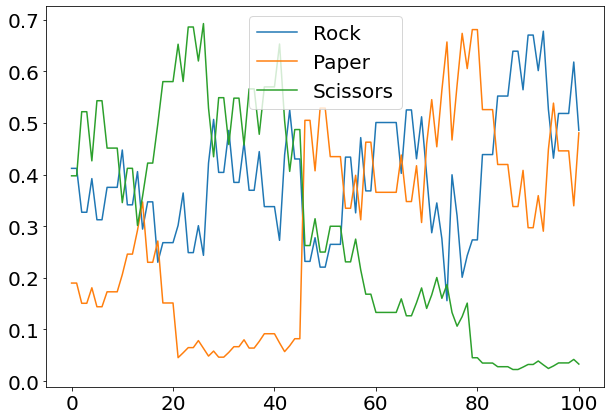

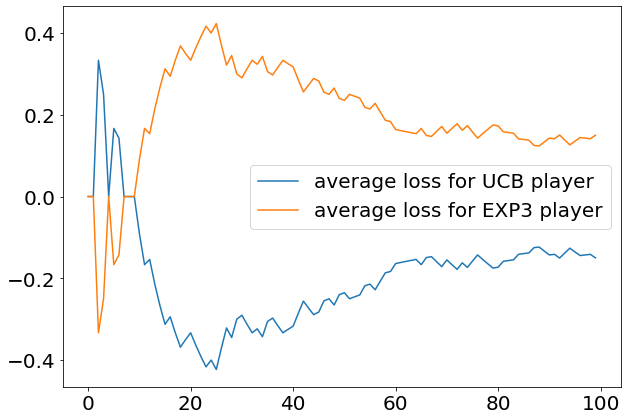

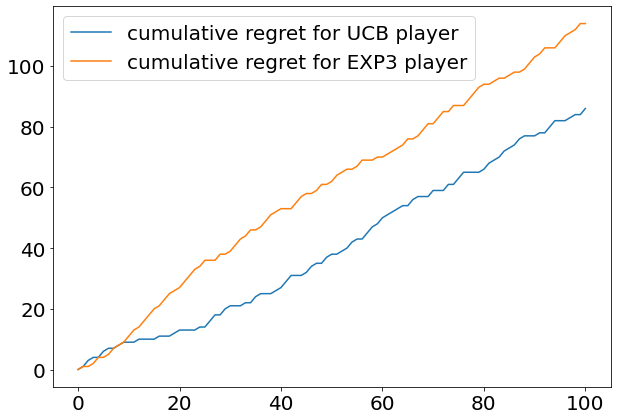

In [ ]:
def UCB(N, avg_loss, t):
  """
  N = vector at time t-1 : nbr of times each action has been picked
  avg_loss = average loss value at time t-1
  t = time
  """
  UCB = []
  for k in range(len(N)):
    if N[k]==0:
      UCB.append(-100)
    else:
      UCB.append( avg_loss - np.sqrt( 2*np.log(t)/N[k] ) )
  return np.argmin(np.array(UCB))

# Simulation
def simulate(q_0, T, eta, L):
  """
  q_0 = vector of proba for EXP3 player, 
  T = time horizon, 
  eta = learning rates, 
  L = loss matrix
  adv is the EXP3 player
  """
  # player 1 : UCB
  loss_t = [0]
  N = np.zeros(len(q_0))
  cumulative_regret = [0]
  avg_loss = 0

  # player 2 : EWA
  q = [q_0]
  loss_t_adv = [0]
  cumulative_regret_adv = [0]

  for t in range(T):

    if t != 0:
      avg_loss = sum(loss_t)/t

    i = UCB(N, avg_loss, t)
    j = rand_weighted(q[-1])
    l = L[i, j]

    # player 1
    N[i] += 1
    best_action = np.argmin(L[:,j])
    loss_t.append( l )
    cumulative_regret.append( cumulative_regret[-1] + l - L[best_action,j] )

    # player 2
    best_action_adv = np.argmin(-L[i,:])
    new_q = exp3_update(q[-1], j, -L[i, :], eta)
    q.append( new_q )
    loss_t_adv.append( -l )
    cumulative_regret_adv.append( cumulative_regret_adv[-1] - l + L[i,best_action_adv] )

  return q, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv


q_0 = np.random.uniform(size=3)
q_0 = q_0/sum(q_0)

print(f"initial strategy of player 2 (playing EXP3): {q_0}")
q, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv = simulate(q_0 = q_0, T = 100, eta = 0.2, L = L)

plt.figure(figsize=(10,7))
for i in range(len(q[0])):
  plt.plot([q[j][i] for j in range(len(q))], label=f"{labels[i]}")
plt.legend();

plt.figure(figsize=(10,7))
avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
avg_loss_adv = [sum(loss_t_adv[:t])/t for t in range(1,len(loss_t_adv))]
plt.plot(avg_loss, label=("average loss for UCB player"))
plt.plot(avg_loss_adv, label=("average loss for EXP3 player"))
plt.legend()
plt.show();

plt.figure(figsize=(10,7))
plt.plot(cumulative_regret, label="cumulative regret for UCB player")
plt.plot(cumulative_regret_adv, label="cumulative regret for EXP3 player")
plt.legend()
plt.show();

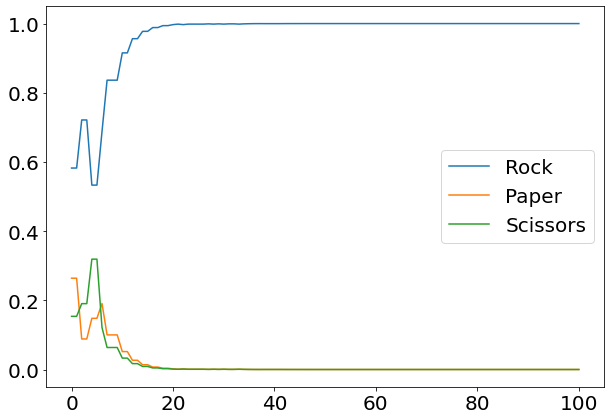

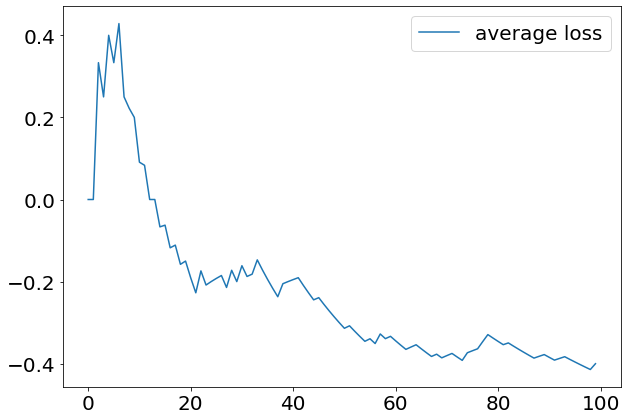

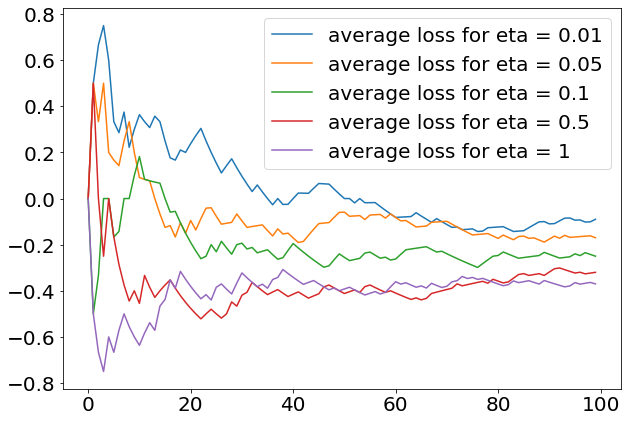

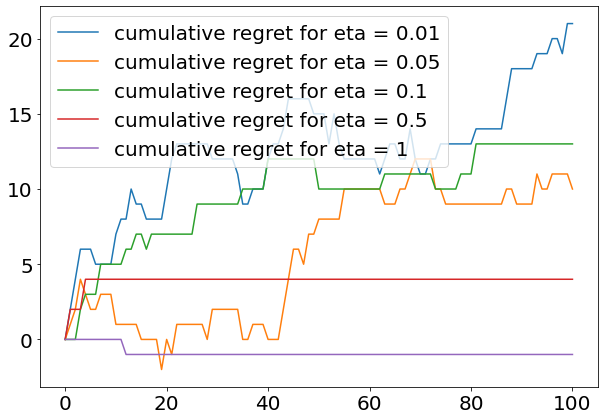

In [ ]:
def exp3_ix_update(p, k, loss, eta, gamma):
  """
  p = vector of proba, 
  k = index action played,
  loss = vector of loss incurred 
  eta = learning rate
  """
  estimated_loss = np.zeros(len(loss))
  estimated_loss[k] = loss[k]/(p[k]+gamma)
  return ewa_update(p, estimated_loss, eta)

# Simulation
def simulate(p_0, q, T, eta, gamma, L):
  """
  p_0 = vector of proba, 
  q = fixed adversary strategy (vector of proba)
  T = time horizon, 
  eta = learning rate, 
  gamma = exploration parameter,
  L = loss matrix
  """
  p = [p_0]
  loss_t = [0]
  cumulative_regret = [0]
  for t in range(T):
    i = rand_weighted(p[-1])
    j = rand_weighted(q)
    l = L[i, j]
    best_action = 0 # playing rock is the best action against this fixed adversary
    new_p = exp3_ix_update(p[-1], i, L[:, j], eta, gamma)
    p.append( new_p )
    loss_t.append( l )
    cumulative_regret.append( cumulative_regret[-1] + l - L[best_action,j] )
  return p, loss_t, cumulative_regret

p_0 = np.random.uniform(size=3)
p_0 = p_0/sum(p_0)

p, loss_t, cumulative_regret = simulate(p_0 = p_0, q = np.array([1./3,1./6,1./2]), T = 100, eta = 1, gamma = 0.5, L = L)
labels = ["Rock", "Paper", "Scissors"]

plt.figure(figsize=(10,7))
for i in range(len(p[0])):
  plt.plot([p[j][i] for j in range(len(p))], label=f"{labels[i]}")
plt.legend();

avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
plt.figure(figsize=(10,7))
plt.plot(avg_loss, label="average loss")
plt.legend();

plt.figure(figsize=(10,7))
regrets = []
for eta in [0.01, 0.05, 0.1, 0.5, 1]:
  p, loss_t, cumulative_regret = simulate(p_0 = p_0, q = np.array([1./3,1./6,1./2]), T = 100, eta = eta, gamma = 0.5, L = L)
  avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
  plt.plot(avg_loss, label=("average loss for eta = " + str(eta)))
  regrets.append(cumulative_regret)
plt.legend()
plt.show();

plt.figure(figsize=(10,7))
eta = [0.01, 0.05, 0.1, 0.5, 1]
for regret in range(len(regrets)):  
  plt.plot(regrets[regret], label="cumulative regret for eta = " + str(eta[regret]))
plt.legend()
plt.show();

**7**

$\begin{matrix}
   & cooperate & do \: not \: coop\\
  cooperate & (1,1) & (3,0) \\
  do \: not \: coop & (0,3) & (2,2) 
\end{matrix}$

initial strategy of player 2 (playing EXP3): [0.5, 0.5]


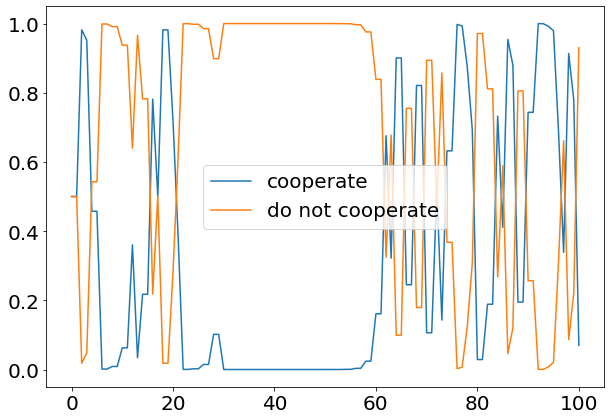

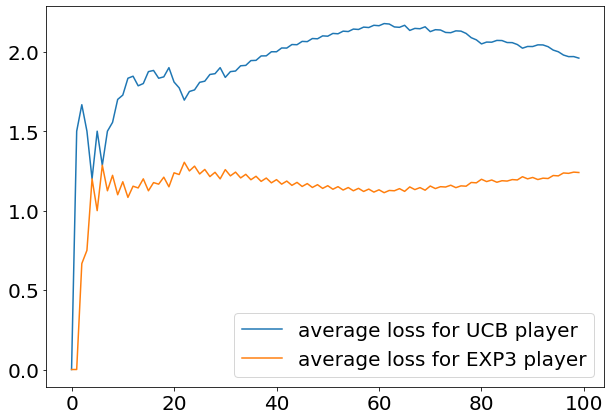

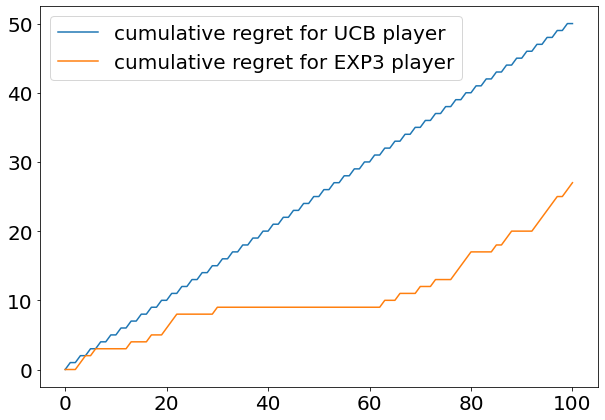

In [ ]:
L_prisonner_player = np.array([[1, 3], [0, 2]])
L_prisonner_adv = np.array([[1, 0], [3, 2]])

p_0 = [1./2,1./2]
q_0 = [1./2,1./2]

rcParams.update({'font.size': 20})

# UCB vs. EWA

# Simulation
def simulate(q_0, T, eta, L_p1, L_p2):
  """
  q_0 = vector of proba for EXP3 player 2, 
  T = time horizon, 
  eta = learning rates, 
  L = loss matrix,
  adv is the EXP3 player 2,
  player 1 plays UCB
  """
  loss_t = [0]
  N = np.zeros(len(p_0))
  cumulative_regret = [0]
  avg_loss = 0

  q = [q_0]
  loss_t_adv = [0]
  cumulative_regret_adv = [0]

  for t in range(T):

    if t != 0:
      avg_loss = sum(loss_t[:t])/t

    i = UCB(N, avg_loss, t)
    j = rand_weighted(q[-1])

    N[i] += 1
    l = L_p1[i, j]
    l_adv = L_p2[i, j]

    best_action = np.argmin(L_p1[:,j])
    best_action_adv = np.argmin(L_p2[i,:])

    new_q = exp3_update(q[-1], j, L_p2[i, :], eta)

    q.append( new_q )

    loss_t.append( l )
    loss_t_adv.append( l_adv )

    cumulative_regret.append( cumulative_regret[-1] + l - L_p1[best_action,j] )
    cumulative_regret_adv.append( cumulative_regret_adv[-1] + l_adv - L_p2[i,best_action_adv] )

  return q, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv

print(f"initial strategy of player 2 (playing EXP3): {q_0}")
q, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv = simulate(q_0 = q_0, T = 100, eta = 1, L_p1 = L_prisonner_player, L_p2 = L_prisonner_adv)

labels = ["cooperate", "do not cooperate"]
plt.figure(figsize=(10,7))
for i in range(len(q[0])):
  plt.plot([q[j][i] for j in range(len(q))], label=f"{labels[i]}")
plt.legend();

plt.figure(figsize=(10,7))
avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
avg_loss_adv = [sum(loss_t_adv[:t])/t for t in range(1,len(loss_t_adv))]
plt.plot(avg_loss, label=("average loss for UCB player"))
plt.plot(avg_loss_adv, label=("average loss for EXP3 player"))
plt.legend()
plt.show();

plt.figure(figsize=(10,7))
plt.plot(cumulative_regret, label="cumulative regret for UCB player")
plt.plot(cumulative_regret_adv, label="cumulative regret for EXP3 player")
plt.legend()
plt.show();

initial strategy of player 2 (playing EXP3): [0.5, 0.5]


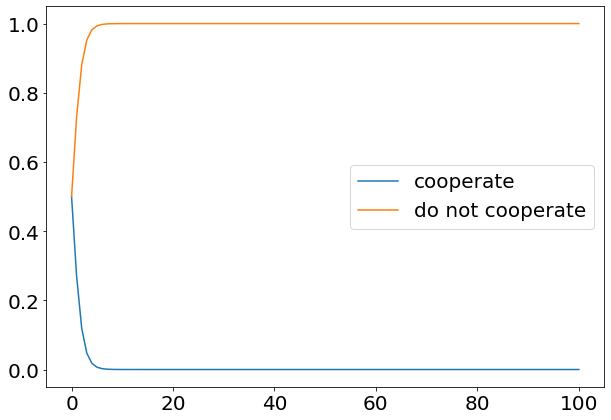

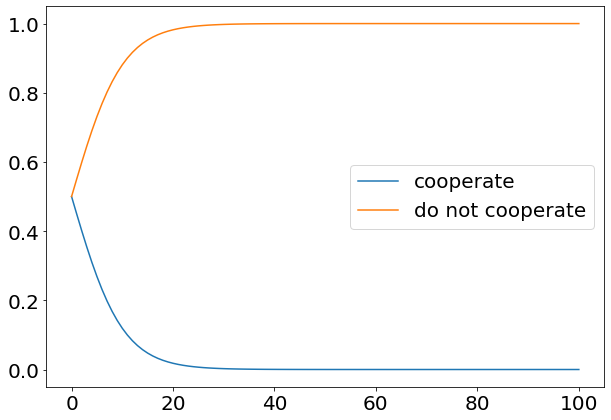

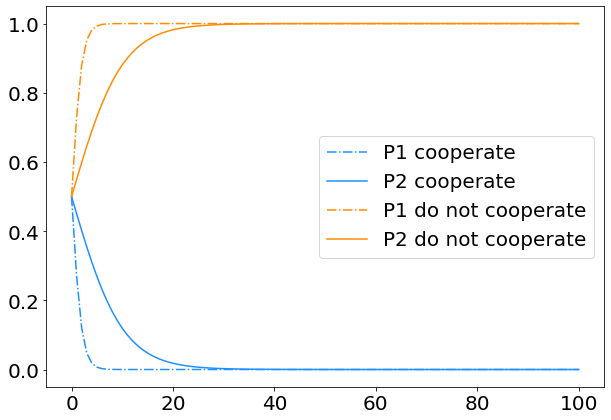

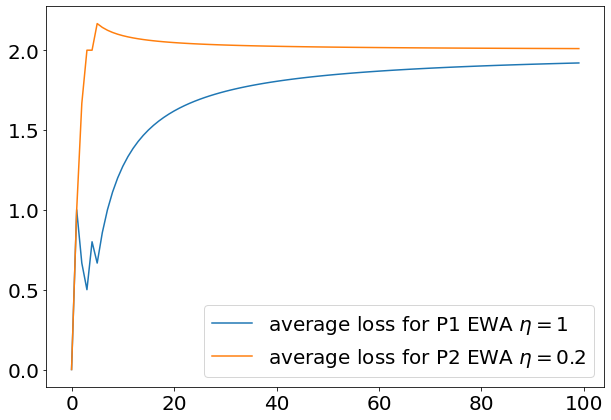

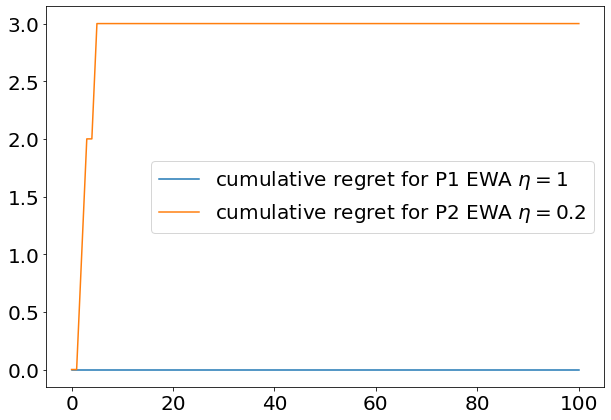

In [ ]:
L_prisonner_player = np.array([[1, 3], [0, 2]])
L_prisonner_adv = np.array([[1, 0], [3, 2]])

p_0 = [1./2,1./2]
q_0 = [1./2,1./2]

rcParams.update({'font.size': 20})

# EWA vs. EWA

# Simulation
def simulate(p_0, q_0, T, eta_1, eta_2, L_p1, L_p2):
  """
  q_0 = vector of proba for EXP3 player 2, 
  T = time horizon, 
  eta = learning rates, 
  L = loss matrix,
  adv is the EXP3 player 2,
  player 1 plays UCB
  """
  loss_t = [0]
  p = [p_0]
  cumulative_regret = [0]

  q = [q_0]
  loss_t_adv = [0]
  cumulative_regret_adv = [0]

  for t in range(T):

    i = rand_weighted(p[-1])
    j = rand_weighted(q[-1])

    l = L_p1[i, j]
    l_adv = L_p2[i, j]

    best_action = np.argmin(L_p1[:,j])
    best_action_adv = np.argmin(L_p2[i,:])

    new_p = ewa_update(p[-1], L_p1[:, j], eta_1)
    new_q = ewa_update(q[-1], L_p2[i, :], eta_2)

    p.append( new_p )
    q.append( new_q )

    loss_t.append( l )
    loss_t_adv.append( l_adv )

    cumulative_regret.append( cumulative_regret[-1] + l - L_p1[best_action,j] )
    cumulative_regret_adv.append( cumulative_regret_adv[-1] + l_adv - L_p2[i,best_action_adv] )

  return p, loss_t, cumulative_regret, q, loss_t_adv, cumulative_regret_adv

print(f"initial strategy of player 2 (playing EXP3): {q_0}")
p, loss_t, cumulative_regret, q, loss_t_adv, cumulative_regret_adv = simulate(p_0 = p_0, q_0 = q_0, T = 100, eta_1 = 1, eta_2 = 0.2, L_p1 = L_prisonner_player, L_p2 = L_prisonner_adv)

labels = ["cooperate", "do not cooperate"]
plt.figure(figsize=(10,7))
for i in range(len(q[0])):
  plt.plot([p[j][i] for j in range(len(p))], label=f"{labels[i]}")
plt.legend();

plt.figure(figsize=(10,7))
for i in range(len(q[0])):
  plt.plot([q[j][i] for j in range(len(q))], label=f"{labels[i]}")
plt.legend();

plt.figure(figsize=(10,7))
colors = ["dodgerblue","darkorange"]
for i in range(len(q[0])):
  plt.plot([p[j][i] for j in range(len(p))], label=f"P1 {labels[i]}", linestyle='-.', c=colors[i])
  plt.plot([q[j][i] for j in range(len(q))], label=f"P2 {labels[i]}", c=colors[i])
  plt.legend();

plt.figure(figsize=(10,7))
avg_loss = [sum(loss_t[:t])/t for t in range(1,len(loss_t))]
avg_loss_adv = [sum(loss_t_adv[:t])/t for t in range(1,len(loss_t_adv))]
plt.plot(avg_loss, label=("average loss for P1 EWA $\eta = 1$"))
plt.plot(avg_loss_adv, label=("average loss for P2 EWA $\eta = 0.2$"))
plt.legend()
plt.show();

plt.figure(figsize=(10,7))
plt.plot(cumulative_regret, label="cumulative regret for P1 EWA $\eta = 1$")
plt.plot(cumulative_regret_adv, label="cumulative regret for P2 EWA $\eta = 0.2$")
plt.legend()
plt.show();

In [ ]:
def bernoulli_KL(p,q):
  return p * np.log(p/q) + (1-p) * np.log((1-p)/(1-q))
   
def f(t, c=0):
    return np.log(t) + c * np.log(np.maximum(0, np.log(t)))

class KLUCB(MoyenneEmpirique):
    """Algorithme KLUCB."""
    
    def __init__(self, K, c=0, tolerance=1e-4):
        """Crée l'instance de l'algorithme. Par défaut, c=0."""
        super(KLUCB, self).__init__(K)  # On laisse la classe mère faire le travaille
        assert c >= 0, "Erreur : c doit etre >= 0."
        self.c = c
        self.tolerance = tolerance
        # Version vectorisée
        self.klucb = np.vectorize(klucbBern)
    
    def choix(self):
        """Si on a vu tous les bras, on prend celui d'indice KLUCB le plus grand."""
        self.t += 1      # Nécessaire ici
        # 1er cas : il y a encore des bras qu'on a jamais vu
        if np.min(self.tirages) == 0:
            k = np.min(np.where(self.tirages == 0)[0])
        # 2nd cas : tous les bras ont été essayé
        else:
            indices = self.klucb(avg_loss, f(self.t, self.c) / self.tirages, self.tolerance)
            k = np.argmax(indices)
        return k

In [ ]:
def bernoulli_KL(p,q):
  return p * np.log(p/q) + (1-p) * np.log((1-p)/(1-q))
  
def KL_UCB(N, K, avg_loss, t, c=0):
  """
  N = vector at time t-1 : nbr of times each action has been picked
  avg_loss = average loss value at time t-1
  t = time
  """
  KL_UCB = []
  for k in range(len(N)):
    if N[k]==0:
      return k
    else:
      theta = np.linspace(0,1,1000)

      def pseudo_kl(q,p,N,t):
        return N * bernoulli_KL(p,q) - log(t)

      pseudo_kl_vector = pseudo_kl(theta,avg_loss,N,t)
      pseudo_kl_vector <= 0

      for coord in 
      KL_UCB.append( N * bernoulli_KL(avg_loss, np.log(t) + c * np.log(np.maximum(0, np.log(t)))) )

  
  return np.argmin(np.array(UCB))

def kL_UCB(N, avg_loss, t):
  """
  N = vector at time t-1 : nbr of times each action has been picked
  avg_loss = average loss value at time t-1
  t = time
  """
  UCB = []
  for k in range(len(N)):
    if N[k]==0:
      UCB.append(-100)
    else:
      UCB.append( avg_loss - np.sqrt( 2*np.log(t)/N[k] ) )
  return np.argmin(np.array(UCB))

class UCB1(MoyenneEmpirique):
    """Algorithme UCB1."""    
    def choix(self):
        """Si on a vu tous les bras, on prend celui d'indice moyenne empirique + UCB le plus grand."""
        self.t += 1      # Nécessaire ici
        # 1er cas : il y a encore des bras qu'on a jamais vu
        if np.min(self.tirages) == 0:
            k = np.min(np.where(self.tirages == 0)[0])
        # 2nd cas : tous les bras ont été essayé
        else:
            moyennes_empiriques = self.recompenses / self.tirages
            ucb = np.sqrt(self.alpha * np.log(self.t) / self.tirages)
            indices = moyennes_empiriques + ucb
            k = np.argmax(indices)
        return k

# Simulation
def simulate(q_0, T, eta, L):
  """
  q_0 = vector of proba for EXP3 player, 
  T = time horizon, 
  eta = learning rates, 
  L = loss matrix
  adv is the EXP3 player
  """
  # player 1 : UCB
  loss_t = [0]
  N = np.zeros(K)
  cumulative_regret = [0]
  avg_loss = 0

  # player 2 : KL_UCB
  loss_t_adv = [0]
  N_adv = np.ones(K)
  cumulative_regret_adv = [0]
  avg_loss_adv = 0

  for t in range():

    if t != 0:
      avg_loss = sum(loss_t)/t

    i = UCB(N, avg_loss, t)
    j = rand_weighted(q[-1])
    l = L[i, j]

    # player 1
    N[i] += 1
    best_action = np.argmin(L[:,j])
    loss_t.append( l )
    cumulative_regret.append( cumulative_regret[-1] + l - L[best_action,j] )

    # player 2
    best_action_adv = np.argmin(-L[i,:])
    new_q = exp3_update(q[-1], j, -L[i, :], eta)
    q.append( new_q )
    loss_t_adv.append( -l )
    cumulative_regret_adv.append( cumulative_regret_adv[-1] - l + L[i,best_action_adv] )

  return q, loss_t, cumulative_regret, loss_t_adv, cumulative_regret_adv

In [ ]:
def bernoulli_KL(p,q):
  return p * np.log(p/q) + (1-p) * np.log((1-p)/(1-q))

def klucb(x, d, kl, upperbound =1, lowerbound = 0, tolerance = 1e-6, maxit=50):
    """
    compute the inner max of KLUCB using bissection algo 
    The generic KL-UCB index computation.

     :param x: value of the cumulative reward,
     :param d: upper bound on the divergence,
     :param  kl: the KL divergence to be used here KlBernou
     :param upperbound, lowerbound :the known bound of the values x,
     :param tolerance : the threshold from where to stop the research (precision)
     :param maxit : max number of iterations of the loop 
     :return the inner max 
    """
    value = max(x, lowerbound)
    u = upperbound
    it = 0 # for counting iterations
    while it < maxit and (u-value)>tolerance:
        it+=1
        m = (value+u)/2 # the center of the interval 
        if kl(x,m)>d:
            u = m
        else:
            value = m
    return (value+u)/2

def f(t, count):
    """
    function that returns the upper bound of the kullback Leibler div
    
    :param t :the step t = 1,...., horizon 
    :parm count: count the number of selection of the arm i,
    :return : f(t, count) 
    """
    logt2 = (math.log(t))**2
    return math.log(1+t*logt2)/count

def test_algorithm(algo, arms, num_sims, horizon, verbose = False):
    """
    function to test our algorithms
    
    :param algo : can be UCB, KLUCB model
    :parm arms: the arms , here Bernoulli arms (2 arms)
    :param num_sims : repeat the simulations several time and take the average 
    :param horizon: the horizon (n)
    :param verbose : bool, to verbose the simulation . False by default
    :return : list with chosen_arms , rewards, cumulative rewards at each step t
    """
    chosen_arms = np.zeros((num_sims, horizon)) # size num_sims*horizon

    rewards = np.zeros((num_sims, horizon))  # size num_sims*horizon
    cumulative_rewards = np.zeros((num_sims, horizon)) # size num_sims*horizon

    for sim in range(num_sims):
        sim = sim +1
        if verbose:
            print('simulation %s'%sim)
        algo.initialize(len(arms))
        for t in range(horizon):
            t = t+1
            chosen_arm = algo.select_arm()
            chosen_arms[sim-1][t-1] = chosen_arm 
            reward = arms[chosen_arm].draw()
            rewards[sim-1][t-1]= reward
            
            if t==1:
                cumulative_rewards[sim-1][0] = reward
            else:
                cumulative_rewards[sim-1][t-1] = cumulative_rewards[sim-1][t-2]+reward
            algo.update(chosen_arm, reward)
    return [chosen_arms, rewards, cumulative_rewards]

def results(mu1, Delta,k =2,num_sims = 100, n = 10000 ):
    """
    function for experimentation 
    :param mu1: the first
    :param Delta: list such that mu_2 = mu_1 + Delta
    :param n : the horizon 
    :return UCB regrets , KLUCB regrets for each element of Delta
    """
    Regrets_UCB = []
    Regrets_KLUCB = []
    for i, delta in enumerate(Delta): 
        print(' delta= %s'%delta)
        mus = [mu1 , mu1 + delta]
        arms = list(map(lambda mu :BernoulliArm(mu), mus))
        # initialisation of algo
        algo = UCB([], [])
        algoklucb = KLUCB([], [])
        
        algo.initialize(k)
        algoklucb.initialize(k)
        
        # cumulative rewards
        result_ucb = test_algorithm(algo, arms,num_sims,n)
        expec_cumul_reward_ucb = result_ucb[2][:,-1].mean() # average over num_sims of the cumulative rewards (the last)
        
        result_klucb = test_algorithm(algokl, arms,num_sims,n)
        expec_cumul_reward_klucb = result_klucb[2][:,-1].mean() 
        
        best_reward = n*max(mus)
        
        Regrets_UCB.append((best_reward - expec_cumul_reward_ucb).copy())
        Regrets_KLUCB.append((best_reward-expec_cumul_reward_klucb).copy())
    return Regrets_UCB, Regrets_KLUCB